In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [2]:
(x_train , y_train),(x_test , y_test) = datasets.cifar10.load_data()

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

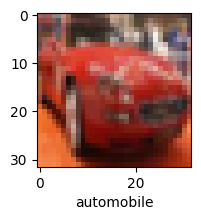

In [8]:
plot_sample(x_train,y_train,5)

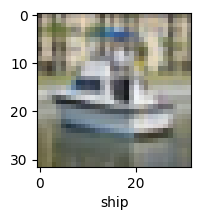

In [9]:
plot_sample(x_train,y_train,501)

In [10]:
# normalizing image
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
# building simple artificial nueral network (ann)
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(5000,activation = 'relu'),#adjust by yourself  
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),
])
ann.compile( optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs = 5)#train according your needs kitni bar train kerna ha epochs matlab

D:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 103ms/step - accuracy: 0.3115 - loss: 1.9194
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.4234 - loss: 1.6406
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 103ms/step - accuracy: 0.4595 - loss: 1.5380
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 106ms/step - accuracy: 0.4761 - loss: 1.4849
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - accuracy: 0.4989 - loss: 1.4255


In [12]:
ann.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4554 - loss: 1.5559


[1.5594900846481323, 0.4487000107765198]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.49      0.51      1000
           1       0.45      0.72      0.55      1000
           2       0.43      0.24      0.31      1000
           3       0.30      0.49      0.37      1000
           4       0.48      0.34      0.40      1000
           5       0.52      0.19      0.27      1000
           6       0.54      0.48      0.51      1000
           7       0.77      0.27      0.40      1000
           8       0.39      0.80      0.53      1000
           9       0.51      0.46      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [15]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

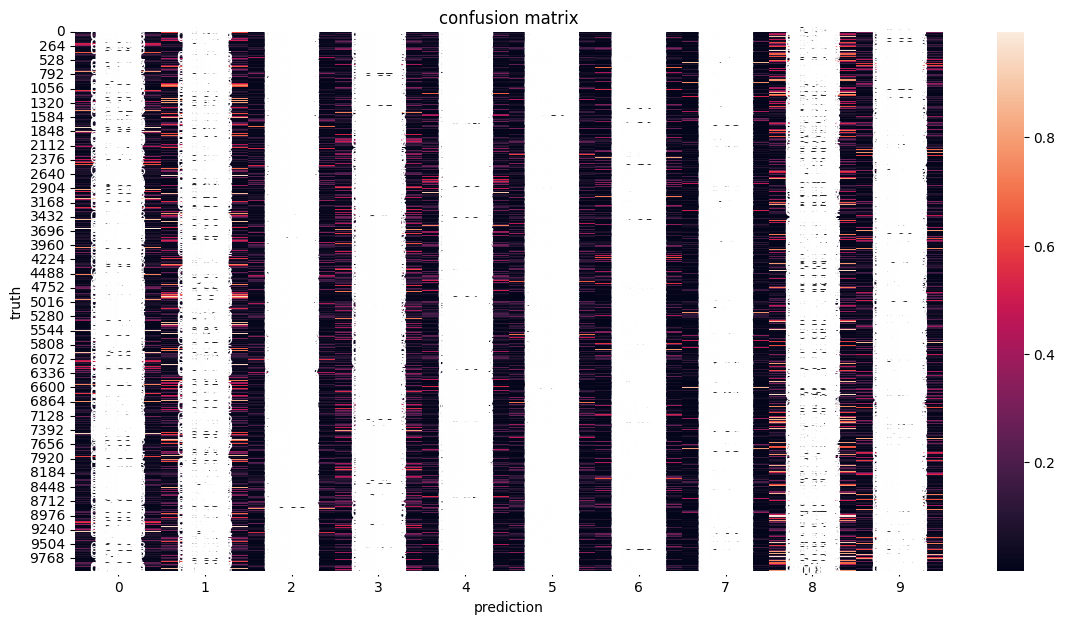

In [16]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel("truth")
plt.xlabel("prediction")
plt.title("confusion matrix")
plt.show

In [17]:
# making cnn model to train images
cnn = models.Sequential([
    layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy' , 
            metrics = ['accuracy'])

In [19]:
cnn.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.3756 - loss: 1.7000
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5810 - loss: 1.1844
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6458 - loss: 1.0207
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6764 - loss: 0.9244
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7044 - loss: 0.8532
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7263 - loss: 0.7889
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7396 - loss: 0.7400
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7658 - loss: 0.6768
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7783 - loss: 0.6342
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7888 - loss: 0.6004


In [20]:
cnn.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6958 - loss: 0.9333


[0.9508939385414124, 0.6887999773025513]

In [21]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[4.05196520e-03, 2.79305299e-04, 1.18086711e-02, 8.63839209e-01,
        8.91547184e-04, 1.12461902e-01, 4.42760793e-04, 7.11802568e-04,
        4.48550470e-03, 1.02738268e-03],
       [1.96984925e-04, 1.22633856e-03, 3.27500175e-07, 1.47440646e-08,
        2.96622247e-08, 6.65376781e-11, 3.04448466e-09, 1.25082208e-10,
        9.98537779e-01, 3.85564308e-05],
       [1.36619825e-02, 1.86632238e-02, 1.12195674e-04, 1.80089992e-04,
        8.26048723e-04, 9.29333692e-06, 4.88059195e-05, 1.19301549e-04,
        9.59901273e-01, 6.47787470e-03],
       [6.96433127e-01, 3.90645005e-02, 2.11396053e-01, 4.68190206e-04,
        1.15479424e-03, 3.38419341e-06, 2.96618982e-05, 7.38515155e-05,
        5.12545854e-02, 1.21838988e-04],
       [3.44706251e-07, 2.43177169e-06, 1.09867956e-02, 8.84191692e-03,
        4.51575965e-01, 7.44396180e-04, 5.27846158e-01, 3.64123309e-07,
        1.51114182e-06, 8.91790819e-08]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in  y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
def predict_and_plot(model, x, y, index):
    predicted_label = np.argmax(model.predict(x[index:index+1]))
    plt.figure(figsize=(15, 4))
    plt.imshow(x[index])
    plt.xlabel(f"True: {classes[y[index]]} | Predicted: {classes[predicted_label]}")
    plt.show()





Using ANN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


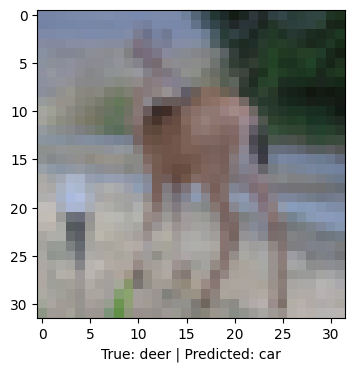

In [25]:
print("Using ANN model:")
predict_and_plot(ann, x_test, y_test, 100)

Using CNN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


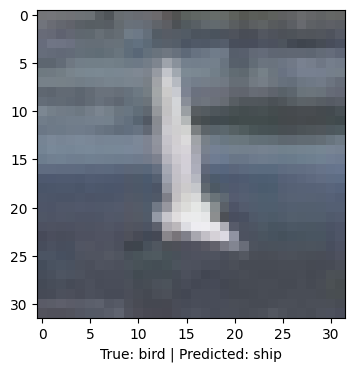

In [26]:
print("Using CNN model:")
predict_and_plot(cnn, x_test, y_test, 7000)

Using ANN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


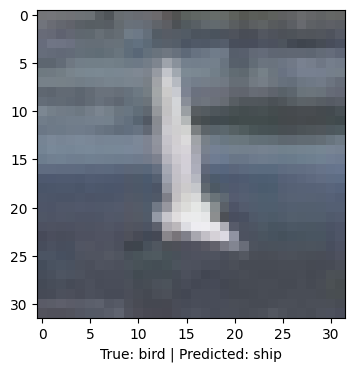

In [27]:
print("Using ANN model:")
predict_and_plot(ann, x_test, y_test, 7000)

Using ANN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


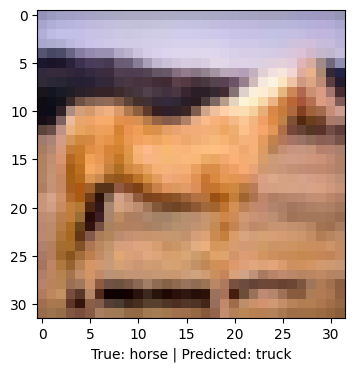

In [28]:
print("Using ANN model:")
predict_and_plot(ann, x_test, y_test, 700)

Using ANN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


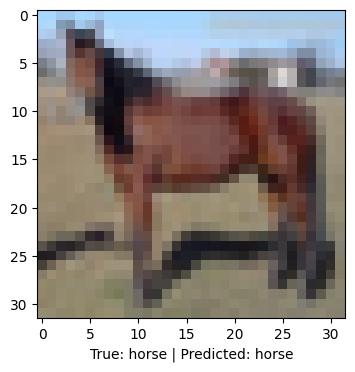

In [29]:
print("Using ANN model:")
predict_and_plot(ann, x_test, y_test, 800)

Using ANN model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


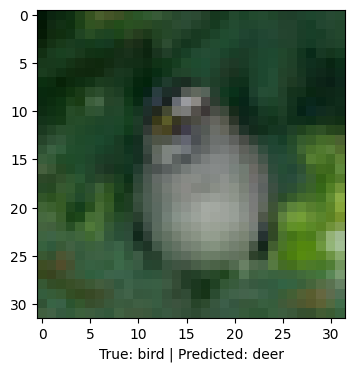

In [30]:
print("Using ANN model:")
predict_and_plot(ann, x_test, y_test, 900)